# Cartopy 2: Shapefile Reader

## Overview
In this notebook, we'll use Cartopy's `shapereader` functions to read the medium (50m) resolution Natural Earth state/provincial boundaries, and select those provinces that are in Canada. Then, we will plot the Canadian provinces, each in a unique color. 

## Imports

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

Read in the medium resolution Natural Earth state/province shapefile. At this resolution, Canadian provinces are included.

In [3]:
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural', name=shapename)

Cartopy's `io.shapereader` library has a `Reader` function that sequentially reads in each line of the shapefile. Each line, accessible via the `records` method, represents one state or province. Let's look at the first 20 records in this file.

In [4]:
states = shpreader.Reader(states_shp).records()
i = 0
for state in states:
    i = i + 1
    country = state.attributes['admin']
    if (i < 20):
        print(i,state.attributes['name'], state.attributes['admin'])
        

1 Western Australia Australia
2 Northern Territory Australia
3 South Australia Australia
4 Queensland Australia
5 Tasmania Australia
6 Victoria Australia
7 Australian Capital Territory Australia
8 Jervis Bay Territory Australia
9 New South Wales Australia
10 Acre Brazil
11 Rondônia Brazil
12 Roraima Brazil
13 Amazonas Brazil
14 Pará Brazil
15 Mato Grosso do Sul Brazil
16 Amapá Brazil
17 Mato Grosso Brazil
18 Paraná Brazil
19 Distrito Federal Brazil


Let's read in this file again, and select only those records where the `admin` attribute, aka the country, is equal to Canada.

In [5]:
states = shpreader.Reader(states_shp).records()
i = 0
for state in states:
    i = i + 1
    country = state.attributes['admin']
    if (country == 'Canada'):
        print(i,state.attributes['name'], state.attributes['admin'])       

37 Alberta Canada
38 British Columbia Canada
39 Manitoba Canada
40 New Brunswick Canada
41 Newfoundland and Labrador Canada
42 Nova Scotia Canada
43 Northwest Territories Canada
44 Nunavut Canada
45 Ontario Canada
46 Prince Edward Island Canada
47 Québec Canada
48 Saskatchewan Canada
49 Yukon Canada


Based on the output above, there are 13 lucky Canadian provinces / territories. Let's now plot a map, centered over Canada, and assign a unique color, which will be used to fill the polygon corresponding to each province/territory, to each of the thirteen.

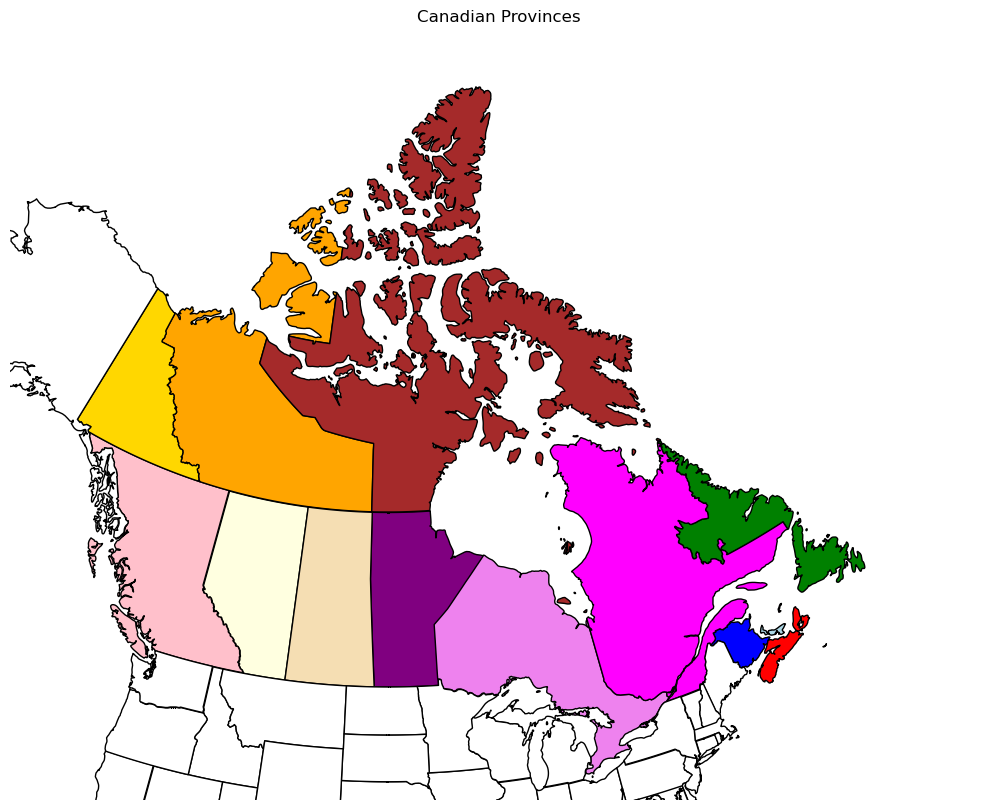

In [14]:
fig = plt.figure(figsize=(15,10))
# to get the effect of having just the states without a map "background"
    # turn off the background patch (ax.patch.set_visible) and axes frame (frameon)
ax = fig.add_subplot(111, projection=ccrs.LambertConformal(central_latitude=60, 
            central_longitude=-100, standard_parallels=(40, 60), cutoff=-30),frameon=False)

ax.set_extent([-130, -50, 37, 85])

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural', name=shapename)
ax.set_title('Canadian Provinces')

#for state in shpreader.Reader(states_shp).geometries():
for state in shpreader.Reader(states_shp).records():
    country = state.attributes['admin']
    stateName = state.attributes['name']
    edgecolor = 'black'
    # simple scheme to assign color to each state
    if stateName == 'Alberta':
        facecolor = "lightyellow"
    elif stateName == 'British Columbia':
        facecolor = "pink"
    elif stateName == 'Manitoba':
        facecolor = "purple"
    elif stateName == 'New Brunswick':
        facecolor = "blue"
    elif stateName == 'Newfoundland and Labrador':
        facecolor = "green"
    elif stateName == 'Nova Scotia':
        facecolor = "red"
    elif stateName == 'Northwest Territories':
        facecolor = "orange"
    elif stateName == 'Nunavut':
        facecolor = "brown"
    elif stateName == 'Ontario':
        facecolor = "violet"
    elif stateName == 'Québec':
        facecolor = "magenta"
    elif stateName == 'Saskatchewan':
        facecolor = "wheat"
    elif stateName == 'Prince Edward Island':
        facecolor = "lightblue"
    elif stateName == 'Yukon':
        facecolor = "gold"
    else:
        facecolor = "white"
    # `state.geometry` is the polygon to plot
    ax.add_geometries([state.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

## Note while this code "works", it is not terribly intuitive. Another library, [GeoPandas](https://geopandas.org), will prove to be an easier way to work with shapefiles such as the Natural Earth state/province one used in this notebook.

<div class="alert alert-warning"><b>Consider:</b><br>How might you adapt this notebook to plot unique colors for states/provinces within a different country?</div>